In [3]:
import requests #call API
import pandas as pd #to change to dataframe
from time import sleep # prevent API server overload in case of blocking the requests

In [4]:
#Sutton coordinate
latitude = 51.3618
longitude = -0.1934

#list of months to import
months = ['2024-09', '2024-10', '2024-11', '2024-12', '2025-01', '2025-02']

In [5]:
def fetch_crime_data(lat, lng, months):
    all_data = []
    
    for month in months:
        print(f"📅 Fetching data for {month}...")
        
        # API URL structure
        url = f"https://data.police.uk/api/crimes-street/all-crime?lat={lat}&lng={lng}&date={month}"
        
        # API request
        response = requests.get(url)
        
        # check the response
        if response.status_code == 200:
            month_data = response.json()
            all_data.extend(month_data)
            print(f"✅ {len(month_data)} records fetched.")
        else:
            print(f"❌ Failed to fetch data for {month} (Status code: {response.status_code})")
        
        # hold to make not too much API is requested
        sleep(1)
        
    return pd.DataFrame(all_data)


In [6]:
df = fetch_crime_data(latitude, longitude, months)

📅 Fetching data for 2024-09...
✅ 457 records fetched.
📅 Fetching data for 2024-10...
✅ 452 records fetched.
📅 Fetching data for 2024-11...
✅ 448 records fetched.
📅 Fetching data for 2024-12...
✅ 362 records fetched.
📅 Fetching data for 2025-01...
✅ 419 records fetched.
📅 Fetching data for 2025-02...
✅ 367 records fetched.


In [ ]:
df.head()

In [8]:
# from location info column, extracted latitude, longitude and street_name only and saved in new columns
df['lat'] = df['location'].apply(lambda loc: float(loc['latitude']) if loc else None)
df['lng'] = df['location'].apply(lambda loc: float(loc['longitude']) if loc else None)
df['street_name'] = df['location'].apply(lambda loc: loc['street']['name'] if loc and 'street' in loc else None)


In [ ]:
df[['category', 'month', 'street_name', 'lat', 'lng']].head(10)

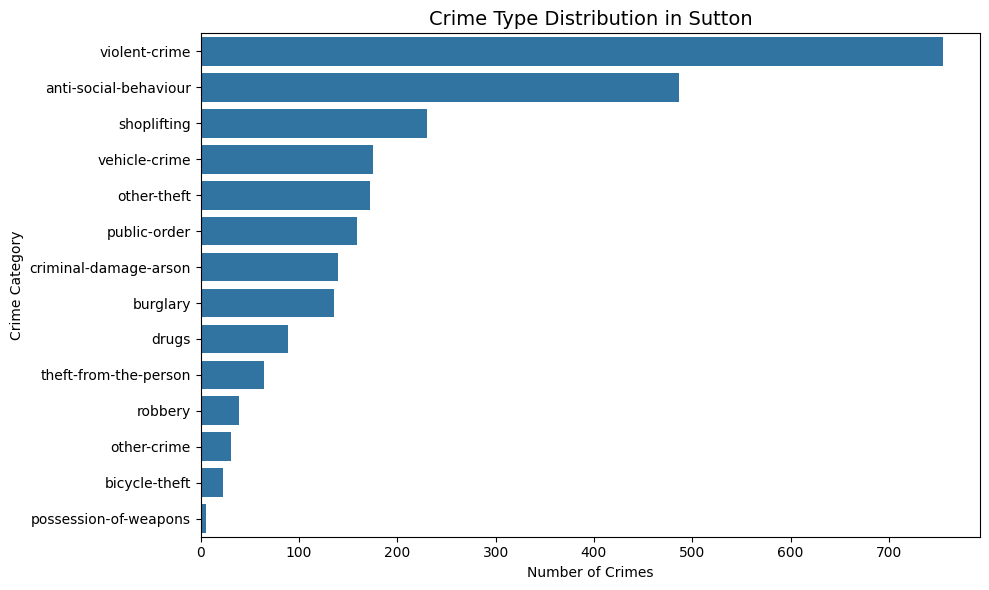

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# set graph size
plt.figure(figsize=(10, 6))

# count by crime category
sns.countplot(y='category', data=df, order=df['category'].value_counts().index)

#labelling titles
plt.title("Crime Type Distribution in Sutton", fontsize=14)
plt.xlabel("Number of Crimes")
plt.ylabel("Crime Category")
plt.tight_layout()
plt.show()

#Insights from “Crime Type Distribution in Sutton”
#Violent crime is by far the most common, followed by anti-social behaviour and shoplifting.
#Property-related crimes such as burglary and vehicle crime are in the mid-range.
#Less frequent crimes include weapons possession and bicycle theft.
#Focus areas for policy or community action might be violence reduction and public order.

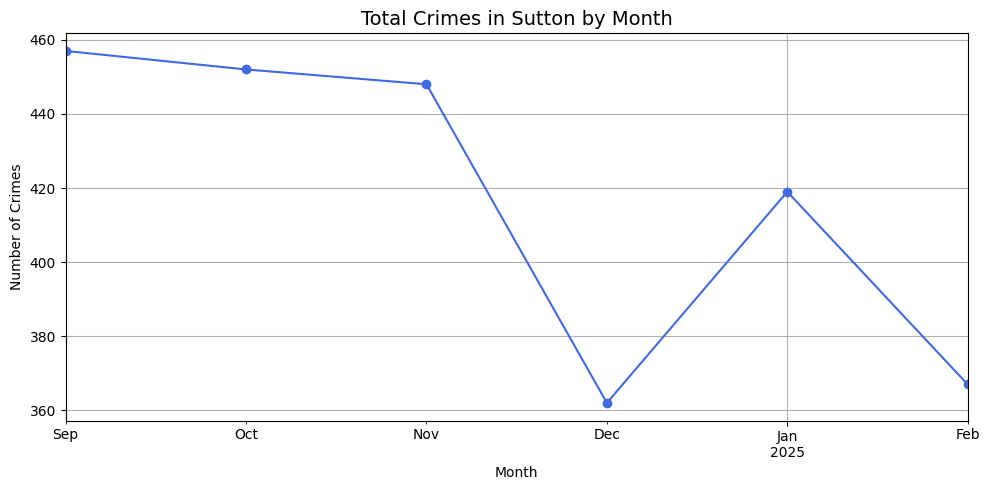

In [26]:
#Convert 'month' column to datetime format
df['month'] = pd.to_datetime(df['month'])

#Group by month and count number of crimes
monthly_counts = df.groupby(df['month'].dt.to_period('M')).size()

#Plot the monthly trend
plt.figure(figsize=(10, 5))
monthly_counts.plot(marker='o', linestyle='-', color='royalblue')

plt.title("Total Crimes in Sutton by Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.grid(True)
plt.tight_layout()
plt.show()

#Changed 'month' column to datetime format to analyse based on date and time
#Counted total number of crime committed by months using groupby function
#Used line graph to present changes over time flow

<Figure size 1200x600 with 0 Axes>

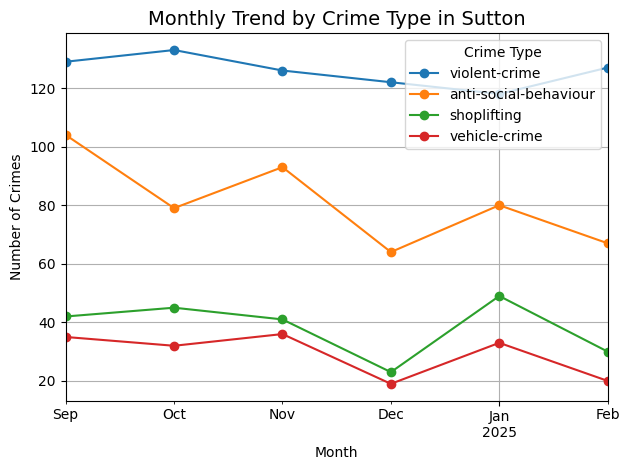

In [27]:
# Group by month and crime category, count number of crimes
monthly_by_type = df.groupby([df['month'].dt.to_period('M'), 'category']).size().unstack().fillna(0)

# Plot time series of selected major crime types
plt.figure(figsize=(12, 6))

# You can customize the list below to focus on certain types
major_types = ['violent-crime', 'anti-social-behaviour', 'shoplifting', 'vehicle-crime']

monthly_by_type[major_types].plot(marker='o')

plt.title("Monthly Trend by Crime Type in Sutton", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.legend(title='Crime Type')
plt.grid(True)
plt.tight_layout()
plt.show()

# From October temperature is getting colder through January which mean people are talking less outdoor activities or going out which influences decrease of violent crime rate.
# other categories has big fluctuation between December to January. From Dec to Jan, there are a lot of sales from businesses which leads people to spend money more than other time. More people on the street for purchasing act means more targets for shoplifting, vehicle crime or burglary.
# Violent crime can be seasonal but shoplifting or vehicle crime is more influencd by economical situations.

#While most crime types including shoplifting and burglary showed a significant increase in January, violent crimes displayed an opposite trend—sharply declining at the beginning of the year before rising again in February.

#This suggests that violent crimes may be more influenced by social interaction and public activity patterns (e.g., holidays and nightlife), whereas other crime types seem more sensitive to economic stress and opportunity-driven factors.